# "Concevez une application au service de la santé publique"
_Cleaning Notebook_
13/08 16h

### Importing Modules

In [23]:
## IMPORTATIONS
import pandas as pd
import pandas_profiling
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import scipy.stats as st

In [24]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [25]:
import sys
sys.executable # 'C:\\ProgramData\\Anaconda3\\python.exe'

'c:\\python37\\python.exe'

### Defining functions

In [26]:
def info (df):
    nb_li = df.shape[0]
    nb_co = df.shape[1]
    t = np.empty(nb_li)
    t.fill(nb_li)
    df_l_null = pd.DataFrame(df.T.isna().sum()) # number of null per row
    df_c_null = pd.DataFrame(df.isna().sum()) # number of null per column
    
    # number of rows without any 'null'
    al = len([x for x in df_l_null[0] if x==0])
    nb_ss_null = pd.DataFrame([al]).rename(index={0:'row_wo_null'}).T
    pct_ss_null = pd.DataFrame([al*100/nb_li]).rename(index={0:'row_wo_null'}).T
    # number of rows with all 'null'
    bl = len([x for x in df_l_null[0] if x==nb_co])
    nb_null = pd.DataFrame([bl]).rename(index={0:'row_null'}).T
    pct_null = pd.DataFrame([bl*100/nb_li]).rename(index={0:'row_null'}).T
    # number of mixed rows (with some null)
    cl = len([x for x in df_l_null[0] if (x!=0 and x!=nb_co)])
    nb_mix = pd.DataFrame([cl]).rename(index={0:'row_mix'}).T
    pct_mix = pd.DataFrame([cl*100/nb_li]).rename(index={0:'row_mix'}).T
    info_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    info_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    info_l = pd.concat([info_nb,info_pct], sort=False)
    # total number of rows
    info_l["row_tot"] = [info_l.T['nb'].sum(), info_l.T['pct'].sum()]
    
    # number of columns without any 'null''
    ac = len([x for x in df_c_null[0] if x==0])
    nb_ss_null = pd.DataFrame([ac]).rename(index={0:'col_wo_null'}).T
    pct_ss_null = pd.DataFrame([ac*100/nb_co]).rename(index={0:'col_wo_null'}).T
    # number of columns with all 'null'
    bc = len([x for x in df_c_null[0] if x==nb_li])
    nb_null = pd.DataFrame([bc]).rename(index={0:'col_null'}).T
    pct_null = pd.DataFrame([bc*100/nb_co]).rename(index={0:'col_null'}).T
    # number of mixed columns (with some null)
    cc = len([x for x in df_c_null[0] if (x!=0 and x!=nb_li)])
    nb_mix = pd.DataFrame([cc]).rename(index={0:'col_mix'}).T
    pct_mix = pd.DataFrame([cc*100/nb_co]).rename(index={0:'col_mix'}).T
    info_nb = pd.concat([nb_ss_null, nb_null, nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    info_pct = pd.concat([pct_ss_null, pct_null, pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    info_c = pd.concat([info_nb,info_pct], sort=False)
    # total number of columns
    info_c["col_tot"] = [info_c.T['nb'].sum(), info_c.T['pct'].sum()]
    
    info = pd.concat([info_l,info_c], axis=1, sort=False)
    
    return info

In [27]:
def desc_bis (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col    
    info = pd.DataFrame(df.dtypes).T.rename(index={0:'type'}) 
    info = info.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    return info

In [28]:
def eval_null (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("Number of 'null' values: {:.0f}".format(a))
    print("Number of values (without 'null'): {:.0f}".format(b))
    print("Total number of cells: {:.0f}".format(a+b))
    print("Total number of 'null' (pct): {:.1f}%".format(a*100/(a+b)))

### Importing dataset

In [29]:
# Import data from csv
filepath = '../DATA/en.openfoodfacts.org.products.csv'
df = pd.read_csv(filepath, sep='\t', low_memory=False, encoding ='utf-8')
#df = pd.read_csv(filepath, sep='\t',nrows=500000, low_memory=False, encoding ='utf-8')
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g'], dtype='object', length=175)

In [30]:
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000000010,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1550246813,2019-02-15T16:06:53Z,1550246813,2019-02-15T16:06:53Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,NaN,nan,unknown,unknown,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,000000000000010,http://world-en.openfoodfacts.org/product/0000...

### Description

In [31]:
# Shape of the dataset
df.shape

(954463, 175)

In [32]:
desc_df_all = desc_bis(df).append(df.describe(include='all'))
desc_df_all

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
type,object,object,object,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,object,object,float64,float64,float64,object,object,object,float64,float64,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [33]:
desc_df_num = df.describe(include=['int64', 'float64'])
desc_df_num = desc_bis(df[desc_df_num.columns]).append(desc_df_num)
desc_df_num

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nova_group,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
type,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,0,0,954463,954463,682531,954463,514866,514866,954463,514866,954463,643286,210296,953515,215300,244643,954462,954463,954462,954459,954456,954462,954460,954462,954460,954462,954463,954460,954462,954463,930236,930182,952977,954176,954367,954335,954114,954266,954448,954460,954462,954426,954443,954463,954463,954463,954463,954463,810237,809488,215249,229028,954346,954415,954397,954071,954454,954449,954086,953706,657730,213026,954425,954429,954451,233245,233264,942914,815582,954394,946223,952122,953447,812038,942208,942726,941892,946687,948492,951384,948267,953935,951494,954362,954209,928452,953971,808966,947797,811984,946796,949966,952177,952613,954241,953148,954408,954405,953891,954242,954379,954325,948739,954190,945024,954177,950074,954461,954061,945394,688644,688644,954460,954463,954433,954460,954443,954427,954448
count,954463,954463,0,0,271932,0,439597,439597,0,439597,0,311177,744167,948,739163,70982

In [34]:
pandas_profiling.__version__

'2.3.0'

In [35]:
dfcopy = df.copy(deep = True)

MemoryError: Unable to allocate array with shape (954463, 175, 3) and data type bool

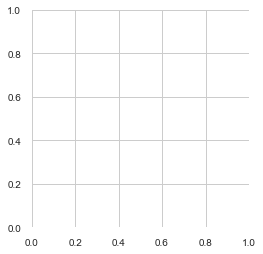

In [36]:
#profile = pandas_profiling.ProfileReport(dfcopy, check_correlation = False)
#profile = dfcopy.profile_report(dfcopy, check_correlation = False)
profile = dfcopy.profile_report(title="OpenFoodFacts dataset",
                                style={'full_width':True},
                                correlations={'pearson': True,
                                              'spearman': False,
                                              'kendall': False,     
                                              'phi_k': False,
                                              'cramers': False,
                                              'recoded': False},
                                plot ={'histogram':{'bayesian_blocks_bins': False, 'bins': 12}},
                               )
rejected_variables = profile.get_rejected_variables(threshold=0.9)
profile.to_file(output_file="./OFFacts_report.html")
rejected_variables

### Data structure

The "data-fields.txt" file mentions 143 columns whereas pd.describe reveals the actual base have 175.

### Missing values

In [ ]:
# Number of 'null' values in the dataset
info_df = info(df)
pd.options.display.float_format = '{:.0f}'.format
info_df.head()

In [ ]:
eval_null(desc_df_all)

In [ ]:
# Vizualisation of missing values
#### Faire l'histogramme avec les axes inverses
#### Faire la même chose pour les lignes

nb_null = desc_df_all.loc["null"].values.astype(int)
pct_null = nb_null*100/df.shape[0]

fig1 = plt.figure(figsize = (15,3))

ax1 = plt.subplot(1,2,1)
ax1.hist(pct_null, bins=20, density=False,
         fc='blue', ec='k', label='20 bins')
plt.xlabel("Pct of null values", fontsize=14)
plt.ylabel("Number of columns", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Histogram (nb of columns per pct of null)", 
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(fontsize=12)

ax2 = plt.subplot(1,2,2)
ax2.hist(nb_null, bins=500, fc='b', alpha =0.5, ec='b', 
         density=False, histtype='stepfilled', cumulative=True,
         label='500 bins')
ax2.hist(nb_null, bins = 20, fc = 'None', ec = 'k', 
         density=False, histtype='step', cumulative=True, 
         label='20 bins')
plt.xlabel("Number of null values", fontsize=14)
plt.ylabel("Number of columns", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Cumulative histogram (nb of columns per nb of null)",
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(loc='lower right',fontsize=12)

plt.show()

#### -> dealing with missing values

### Duplicates

#### -> dealing with duplicates

- relancer le describe pour la partie numérique seule
OK - pourcentage de données manquantes
- retirer les produits sans noms
- garder seulement les items ayant plus de XX % de données renseignées (éliminer d'abord les lignes)
- respect des bornes (0-100g)
    - combien d'entrées concernés
    - facile à corriger ou pas ?
- outliers exceeding 3 sigmas
    - nombreux ou pas ?
    - traitement au cas par cas éventuellement

- trouver la structure des données/catégorisation des colonnes
- élimination ou sélection de certaines colonnes ?
- vérifier la cohérence des infos (calories/joules et somme des énergies des différentes classes)
- reconstruire les valeurs manquantes

- "google colab" ou splitter la base

Exploration
Analyse univariée :
- box plot, violin plot, nuages de dispersion
- hisogrammes pour différentes variables
- produits ayant le plus grand nombres d'ingrédients

Analyse mulivariée :
- matrice de corrélation pour plusieurs variables
- diagramme de dispersion en fonction du nutriscore pour pls groupes de 2 variables

### Outliers

#### -> dealing with outliers

### Rescaling data

In [ ]:
# separating numerical data from object data
num_df = df.select_dtypes(include="number")
obj_df = df.select_dtypes(include="object")
df.shape, num_df.shape, obj_df.shape

In [ ]:
# # no need for the datetime columns
# # cols = [c for c in df.columns if c.lower()[-9:] != '_datetime' and c.lower()[-2:] != '_t']
# cols = [c for c in df.columns if c.lower()[-5:] == '_100g']
# cols.append('code')
# df = df[cols]

# # eliminate null values
# df = df[(df['energy_100g'] != 0) & (df['nutrition-score-fr_100g'] != 0)]

# # we keep only column 70% filled
# thresh = len(df) * .3
# df.dropna(thresh = thresh, axis = 1, inplace = True)

# df = df.fillna(0)

# df = df.round(5)

In [ ]:
%%notify
import time
time.sleep(5)

### Define categories

In [ ]:
# posteDep = {
#     'EMPLOI': 'Entrées',
#     'PAIE': 'Entrées',
#     'SAADNA': 'E